<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#7.1-基于数据集多重抽样的分类器" data-toc-modified-id="7.1-基于数据集多重抽样的分类器-1">7.1 基于数据集多重抽样的分类器</a></span><ul class="toc-item"><li><span><a href="#7.1.1-bagging：基于数据随机重抽样的分类器构建方法" data-toc-modified-id="7.1.1-bagging：基于数据随机重抽样的分类器构建方法-1.1">7.1.1 bagging：基于数据随机重抽样的分类器构建方法</a></span><ul class="toc-item"><li><span><a href="#7.1.2-boosting" data-toc-modified-id="7.1.2-boosting-1.1.1">7.1.2 boosting</a></span></li></ul></li></ul></li><li><span><a href="#7.2-训练算法：基于错误提升分类器的性能" data-toc-modified-id="7.2-训练算法：基于错误提升分类器的性能-2">7.2 训练算法：基于错误提升分类器的性能</a></span></li><li><span><a href="#7.3-基于单层决策树构建的弱分类器" data-toc-modified-id="7.3-基于单层决策树构建的弱分类器-3">7.3 基于单层决策树构建的弱分类器</a></span></li><li><span><a href="#7.4-完整AdaBoost算法实现" data-toc-modified-id="7.4-完整AdaBoost算法实现-4">7.4 完整AdaBoost算法实现</a></span></li><li><span><a href="#7.5-测试算法：基于AdaBoost的分类" data-toc-modified-id="7.5-测试算法：基于AdaBoost的分类-5">7.5 测试算法：基于AdaBoost的分类</a></span></li><li><span><a href="#7.6-示例：在一个难数据集应用AdaBoost" data-toc-modified-id="7.6-示例：在一个难数据集应用AdaBoost-6">7.6 示例：在一个难数据集应用AdaBoost</a></span></li><li><span><a href="#7.7-非均衡分类问题" data-toc-modified-id="7.7-非均衡分类问题-7">7.7 非均衡分类问题</a></span><ul class="toc-item"><li><span><a href="#7.1.1-其他分类性能度量指标：正确率、召回率和ROC曲线" data-toc-modified-id="7.1.1-其他分类性能度量指标：正确率、召回率和ROC曲线-7.1">7.1.1 其他分类性能度量指标：正确率、召回率和ROC曲线</a></span></li><li><span><a href="#7.7.2-基于代数函数的分类器决策控制" data-toc-modified-id="7.7.2-基于代数函数的分类器决策控制-7.2">7.7.2 基于代数函数的分类器决策控制</a></span></li><li><span><a href="#7.7.3-处理非均衡问题的数据抽样方法" data-toc-modified-id="7.7.3-处理非均衡问题的数据抽样方法-7.3">7.7.3 处理非均衡问题的数据抽样方法</a></span></li></ul></li><li><span><a href="#7.8-本章小结" data-toc-modified-id="7.8-本章小结-8">7.8 本章小结</a></span></li></ul></div>

# 利用AdaBoost元算法提高分类性能
元算法是对其他算法进行组合的一种方式。某些人认为AdaBoost是最好的机器学习监督算法，该方法是机器学习工具箱中强有力的工具之一。
## 7.1 基于数据集多重抽样的分类器
集成的方法有很多方式：可以是不同算法的集成，也可以是一个算法不同设置的集成，还可以是一个数据集不同部分分配给不同分类器的集成。
**AdaBoost**
1. 优点：泛化错误率低，易编码，可以用在大部分分类器上，无参数调节
2. 缺点：对离群点敏感
3. 适用数据类型：数值型和标称型
### 7.1.1 bagging：基于数据随机重抽样的分类器构建方法
自举汇聚法（bootstrap aggregating）也称为bagging方法，在原始数据集上重抽样S次构建出大小和原数据集一样的的S个数据集，这S个数据集可以有重复的样本，也有相对于原始数据集缺失些样本以保证大小一致。更先进的bagging方法是随机森林。
#### 7.1.2 boosting
boosting和bagging比较相似，不同在于boosting是串行的，用来关注那些被前边分类器错误分类的数据集，从而生成新的分类器。Boosting有多种方法，本章只关注AdaBoost。
**AdaBoost一般流程**
1. 收集数据：可以使用任何方法
2. 准备数据：依赖于所使用的弱分类器类型，本章使用的是单层决策树，这种分类器可以处理任何数据类型。当然也可以使用任意分类器作为弱分类器。
3. 分析数据：任意方法
4. 训练算法：AdaBoost的大部分时间都用在了训练上面，分类器将多次在同一个数据集上训练弱分类器
5. 测试算法：计算分类的错误率
6. 使用算法：同SVM一样，AdaBoost预测两个类别中的一个，如果想应用到多个类别中，就需要象SVM那样修改。

## 7.2 训练算法：基于错误提升分类器的性能
Adaboost 是adaptive boosting的缩写，其运行过程如下：训练数据中的每个样本，并赋予其一个权重，这些权重构成了向量D。为了从所有弱分类器中得到最终的分类结果，AdaBoost为每个分类器都分配了一个权重值alpha，这些alpha值是基于每个弱分类器错误率进行计算的，其中，错误率$\xi$定义为：
$$\xi = \frac{未分类正确的样本数目}{所有样本数目}$$
而$\alpha$的计算公式如下：
$$\alpha = \frac{1}{2}ln\left({\frac{1-\xi}{\xi}}\right)$$
D的计算方式如下：
如果某个样本被正确分类：
$$D_i^{(t+1)} = \frac{D_i^{(t)}e^{-a}}{Sum(D)}$$
如果某个样本被错误分类：
$$D_i^{(t+1)} = \frac{D_i^{(t)}e^{a}}{Sum(D)}$$

AdaBoost算法会不断地重复训练和调整权重的过程，知道训练错误率为0或者弱分类器的数目达到用户指定为止。
## 7.3 基于单层决策树构建的弱分类器
单层决策树是一种简单的决策树，

In [1]:
from numpy import *
def loadSimpData():
    datMat = matrix([[1.0, 2.1],
                     [2.0, 1.1],
                     [1.3, 1.0],
                     [1.0, 1.0],
                     [2.0, 1.0]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat, classLabels

构造多个函数来建立单层决策树，第一个函数将用于测试是否有某个值小于或者大于我们正在测试的阈值;第二个函数会在一个加权数据集中循环，并找到具有最低错误率的单层决策树。
伪代码如下：

    初始化最小错误率minError为正无穷
    对数据集中每一个特征（第一层循环）：
        对每个步长（第二层循环）：
            对每个不等号（第三层循环）：
            建立一棵单层决策树并利用加权数据集对它进行测试
            如果错误率低于minError，则将当前单层决策树设为最佳单层决策树
    返回最佳单层决策树


In [2]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
#     print dataMatrix, dimen, threshVal, threshIneq
    retArray = ones((shape(dataMatrix)[0],1))
    if threshIneq == 'It':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray
def buildStump(dataArr, classLabels, D):
    dataMatrix = mat(dataArr)
    labelMat = mat(classLabels).T
    m, n = shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = mat(zeros((m,1)))
    minError = inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min()
        rangeMax = dataMatrix[:,i].max()
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1, int(numSteps)+1):
            for inequal in ['It', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                errArr = mat(ones((m,1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr
#                 print "split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" \
#                       % (i, threshVal, inequal, weightedError)
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [3]:
D = mat(ones((5,1))/5)
datMat, classLabels = loadSimpData()

In [4]:
buildStump(datMat, classLabels, D)

({'dim': 0, 'ineq': 'It', 'thresh': 1.3}, matrix([[ 0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

## 7.4 完整AdaBoost算法实现
伪代码如下：
    
    对每次迭代：
      利用buildStump()函数找到最佳的单层决策树
      将最佳的单层决策树加入到单层决策树数组
      计算alpha
      计算新的权重向量
      更新累计类别估计量
      如果错误率等于0.0,则退出循环
      

In [24]:
def adaBoostTrainDS(dataArr, classLabels, numIt=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m)
    aggClassEst = mat(zeros((m, 1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
#         print "D:", D.T
        alpha = float(0.5*log((1.0-error)/max(error,1e-16)))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)
#         print "classEst:", classEst.T
        expon = multiply(-1*alpha*mat(classLabels).T, classEst)
        D = multiply(D, exp(expon))
        D = D/D.sum()
        aggClassEst += alpha*classEst
#         print "aggClassEst: ", aggClassEst.T
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T, ones((m, 1)))
        errorRate = aggErrors.sum()/m
        print "total error: ", errorRate, "\n"
        if errorRate == 0.0:
            break
#     return weakClassArr
    return weakClassArr, aggClassEst    # for ROC curve

In [25]:
adaBoostTrainDS(datMat, classLabels, 9)

total error:  0.2 

total error:  0.2 

total error:  0.0 



([{'alpha': 0.6931471805599453, 'dim': 0, 'ineq': 'It', 'thresh': 1.3},
  {'alpha': 0.9729550745276565, 'dim': 1, 'ineq': 'It', 'thresh': 1.0},
  {'alpha': 0.8958797346140273,
   'dim': 0,
   'ineq': 'It',
   'thresh': 0.90000000000000002}],
 matrix([[ 1.17568763],
         [ 2.56198199],
         [-0.77022252],
         [-0.77022252],
         [ 0.61607184]]))

## 7.5 测试算法：基于AdaBoost的分类
一旦拥有多个弱分类器和其对应的alpha值，测试就相当容易了。

In [26]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m, 1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'],\
                                classifierArr[i]['thresh'], classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
#         print aggClassEst
    return sign(aggClassEst)

In [27]:
datArr, labelArr = loadSimpData()
classifierArr = adaBoostTrainDS(datArr, labelArr, 30)
adaClassify([0,0],classifierArr)

total error:  0.2 

total error:  0.2 

total error:  0.0 



TypeError: list indices must be integers, not str

## 7.6 示例：在一个难数据集应用AdaBoost
利用第4章使用的氙气病数据集，查看利用多个单层决策树和AdaBoost能不能预测的更准确。

1. 收集数据：提供文本文件
2. 准备数据：确保类别标签+1和-1而非1和0
3. 分析数据：手工检查数据
4. 训练算法：在数据集上，利用adaBoostTrainDS()函数训练出一系列分类器
5. 测试算法：我们拥有两个数据集，在采用随机抽样的方法下，我们就会对AdaBoost和Logistic回归的结果进行完全对等的比较
6. 使用算法：观察该例子上的错误率

In [21]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t'))
    dataMat, labelMat = [], []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [22]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray = adaBoostTrainDS(datArr, labelArr, 10)


total error:  0.284280936455 

total error:  0.284280936455 

total error:  0.247491638796 

total error:  0.247491638796 

total error:  0.254180602007 

total error:  0.240802675585 

total error:  0.240802675585 

total error:  0.220735785953 

total error:  0.247491638796 

total error:  0.230769230769 



## 7.7 非均衡分类问题
在大多数情况下，不同类别的分类代价不相等，我们需要考察一种新的分类器性能度量方式，通过图像技术来对非均衡问题下不同分类器的性能进行可视化处理。
### 7.1.1 其他分类性能度量指标：正确率、召回率和ROC曲线
前边的例子都是基于错误率来衡量分类器任务的成功程度，错误率是所有测试样本中错误分类的样本比例。在机器学习中，有一个普遍适用的称为混淆矩阵的工具，可以帮助人们更好的了解分类中的错误。

|   |   |    |   |   |
|:-:|:-:|:-: |:-:|:-:|
|    |预 |测  |结 |果 |   |
|真  |   | 狗 |猫 |鼠 |
|实  |狗 |24  |2  |5  |
|结  |猫 |2   |27 |0  |
|果  |鼠 |4   |2  |30 |

下面是一个简单的二分类问题，下表给出了其混淆矩阵。先理解几个概念：
- __TP__: 真正例，将一个正例判定为正例
- __TN__: 真反例，将一个反例判定为反例
- __FN__: 伪反例，将一个反例判定为正例
- __FP__: 伪正例，将一个正例判定为反例

|  |   |   |    |
|:-|:-:|:-:|:-: |
|  | 预  |  |测  |
| 真 |   | +1 |-1 |
||+1 |TP  |FN |
|实|-1 |FP  |TN |

- 正确率(Precision)  $TP/(TP+FP)$ 给出预测真正正例（TP）在预测为正例（TP+FP）的比例
- 召回率(Recall)  $TP/(TP+FN)$ 给出预测真正正例（TP）在数据集中正例（TP+NF）的比例

In [30]:
# roc曲线的绘制及AUC计算函数
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    %matplotlib inline
    cur = (1.0, 1.0)
    ySum = 0.0
    numPosClas = sum(array(classLabels)==1.0)
    yStep = 1/float(numPosClas)
    xStep = 1/float(len(classLabels)-numPosClas)
    sortedIndicies = predStrengths.argsort()
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX, delY = 0, yStep
        else:
            delX, delY = xStep, 0
            ySum += cur[1]
        ax.plot([cur[0], cur[0]-delX], [cur[1], cur[1]-delY], c='b')
        cur = (cur[0]-delX, cur[1]-delY)
    ax.plot([0,1], [0,1], 'b--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for AdaBoost Horse Colic Detection System')
    ax.axis([0, 1, 0, 1])
    plt.show()
    print "the Area Under the Curve is: ", ySum*xStep

total error:  0.284280936455 

total error:  0.284280936455 

total error:  0.247491638796 

total error:  0.247491638796 

total error:  0.254180602007 

total error:  0.240802675585 

total error:  0.240802675585 

total error:  0.220735785953 

total error:  0.247491638796 

total error:  0.230769230769 



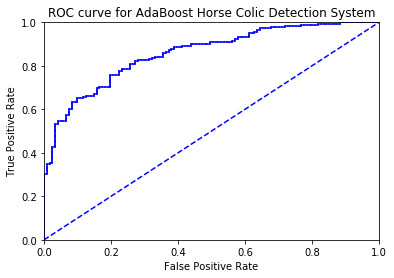

the Area Under the Curve is:  0.858296963506


In [31]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray, aggClassEst = adaBoostTrainDS(datArr, labelArr, 10)
plotROC(aggClassEst.T, labelArr)

### 7.7.2 基于代数函数的分类器决策控制
除了调节分类器的阈值之外，我们还需要处理非均衡分类的问题，其中一种方法是代价敏感学习。

在分类算法中，我们有很多方式引入代价信息，在AdaBoost中，可以基于代价函数来调整错误权重向量D。在朴素贝叶斯中，可以选择最小期望代价而不是最大概率的类别作为最后的结果，在SVM中，可以在代价函数中对于不同的类别选择不同的参数C。上述做法就会给较小的类更多的权重。
### 7.7.3 处理非均衡问题的数据抽样方法
通过欠采样和过采样来调节，过采样意味着复制样例，而欠采样意味着删除样例。通常也会存在某个罕见的类别需要我们来识别，对于罕见的类别尽可能多的保留信息，因此，我们应该保留这些罕见类别的所有样例。
## 7.8 本章小结